# Teste A/B

Análise realizada com 2 campanhas de Marketing diferentes, para definir qual teve um desempenho melhor.

<strong>Análise<strong>
    
- Queremos comparar os resultados de duas campanhas de marketing que foram realizadas ao mesmo tempo online em uma loja de e-commerce  

- Dividimos a <b>campanha A</b>(controle) para 50% do publico, com base no tráfego de cookies e a <b>campanha B</b>(teste) com outros 50%.

- Ambas as campanhas duraram 90 dias


- Metricas que serão analisadas:
   - CTR : " click through rate" número de cliques / número de vezes que a propaganda apareceu
   - CR :  "conversion rate" número de clientes que compraram o produto / número de clientes que viram a propaganda
   - CPC :  custo por clique
   - CPA : custo por aquisição.

<strong>Experimento</strong><br>
Percentual de confiança utilizado:<br>
Para 95% de confiança temos o valor de Z definido por 1,96.
  


Médias das métricas atuais da empresa:
- CTR: 1%
- <strong>CR: 0.5%
- Variancia do CR: 10
- CPC: 0.20 USD
- CPA: 0.75 USD

Esperamos detectar no minimo 15% de diferença na media de <b>CR</b> que iremos utilizar como fator de multiplicação na nossa métrica atual.
    
<strong>Fórmula</strong><br>
Utilizada para determinar o tamanho da amostra que iremos necessitar para conduzir o Teste com 95% de confiança
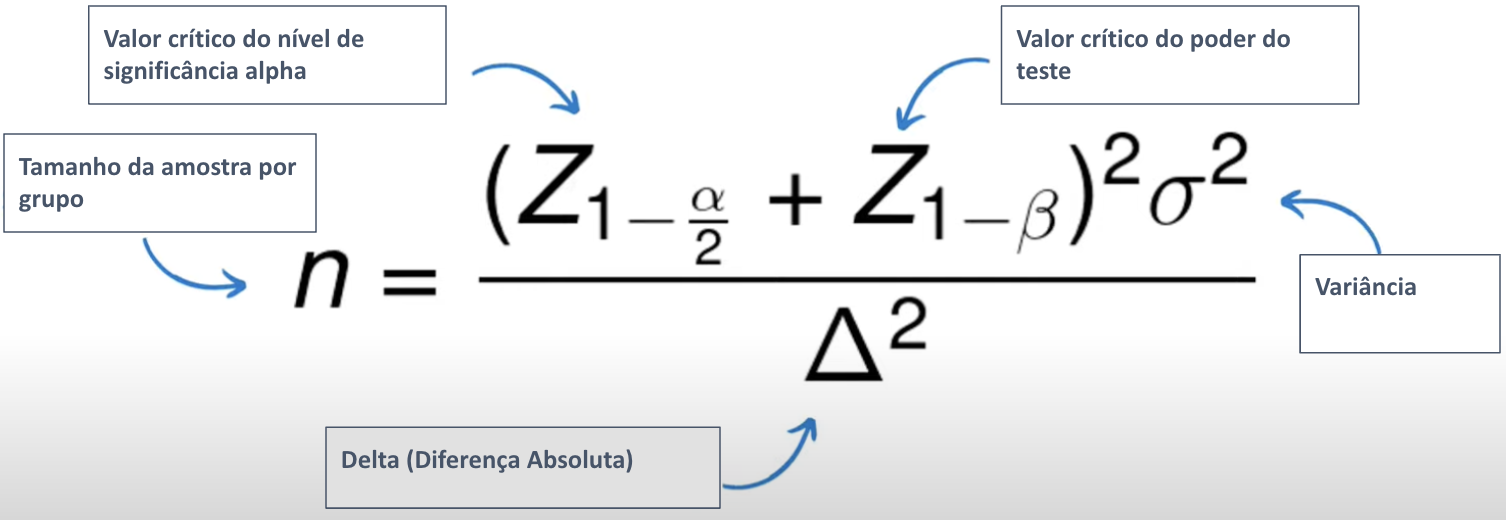

In [2]:
# Bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # para obter estatisticas de teste

#### Preparação dos valores para calculo da amostra

In [16]:
z = 1.96
print(f"Nível de confiança Z: {z}")

b = 0.20
poder_teste = 1-b
print(f"Poder de teste 1-beta: {poder_teste}")

variancia_atual = 10
print(f"Variância do grupo de controle(campanha A): {variancia_atual}")

# delta
media_atual_cr = 0.5
acrescimo = 0.15
fator_multiplicacao = media_atual_cr*(1+acrescimo)
print(f"Taxa de conversão atual: {media_atual_cr}")
print(f"Taxa de conversão com acrescimo: {fator_multiplicacao}")
delta = (fator_multiplicacao - media_atual_cr)**2
print(f"Delta: {delta}")

Nível de confiança Z: 1.96
Poder de teste 1-beta: 0.8
Variância do grupo de controle(campanha A): 10
Taxa de conversão atual: 0.5
Taxa de conversão com acrescimo: 0.575
Delta: 0.005624999999999994


#### Fórmula

In [15]:
n = (((z + poder_teste)**2) * variancia_atual)/delta
print(f"Tamanho de amostra ideal para cada grupo: {n:.0f}")
n2 = n * 2
print(f"Dados totais necessários: {n2:.0f}")

Tamanho de amostra ideal para cada grupo: 13542
Dados totais necessários: 27085


Precisaremos de 27.084 dados para conseguirmos notar um efeito de 15% de aumento de conversão do botão com 95% de confianca e 80% de poder do teste

### Análise dos resultados do teste A/B

In [2]:
teste = pd.read_csv('test_group.csv', sep=';')
controle = pd.read_csv('control_group.csv', sep=';')

In [4]:
teste.shape

(30, 10)

Nesses dataframes os dados estão agregados por dias, desse modo 30 nao representa o numero de dados, e sim os numeros totais agregados.

In [41]:
teste['Reach'].sum() # Temos 1.6 milhões de alcance na campanha B, o tamanho da nossa amostra necessária era de 27084

1604747

In [42]:
controle['Reach'].sum() # Temos 2.5 milhões de alcance na campanha A, o tamanho da nossa amostra necessária era de 27084

2576503.0

#### Análise de métricas

In [ ]:
#CTR
ctr_controle = controle['# of Website Clicks'].sum()/controle['# of Impressions'].sum()
ctr_teste = teste['# of Website Clicks'].sum()/teste['# of Impressions'].sum()

#CR
cr_controle = controle['# of Purchase'].sum()/controle['# of Website Clicks'].sum()
cr_teste =  teste['# of Purchase'].sum()/teste['# of Website Clicks'].sum()

#CPC
cpc_controle = controle['Spend [USD]'].sum()/controle['# of Website Clicks'].sum()
cpc_teste =  teste['Spend [USD]'].sum()/teste['# of Website Clicks'].sum()

#CPA
cpa_controle = controle['Spend [USD]'].sum()/controle['# of Purchase'].sum()
cpa_teste = teste['Spend [USD]'].sum()/teste['# of Purchase'].sum()

In [7]:
print(f"Controle CTR: {ctr_controle:.4f} vs Teste CTR: {ctr_teste:.4f}")
print(f"Controle CR: {cr_controle:.4f} vs Teste CR: {cr_teste:.4f}")
print(f"Controle CPC: {cpc_controle:.4f} vs Teste CPC: {cpc_teste:.4f}")
print(f"Controle CPA: {cpa_controle:.4f} vs Teste CPA: {cpa_teste:.4f}")

Controle CTR: 0.0486 vs Teste CTR: 0.0809
Controle CR: 0.0983 vs Teste CR: 0.0864
Controle CPC: 0.4449 vs Teste CPC: 0.4249
Controle CPA: 4.5283 vs Teste CPA: 4.9173


Minha analise inicial: 

Podemos observar o número de clicks em relação as impressões no grupo B(teste) foi claramente maior porém teve uma taxa de conversão bem menor que o grupo A. U número maior de pessoas visualizando a campanha não significa que irá gerar maior lucro, isso pode se dar pelo fato da campanha estar atingindo um público errado ou a campanha não está sendo atrativa o suficiente para que o público venha eventualmente clicar e comprar. Podemos observar que o investimento feito no grupo A gerou mais lucro pela diferença de CPA com o grupo B, apesar do CPC ser um pouco maior no grupo A, podemos compensar com as aquisições maiores.

### Visualização das métricas

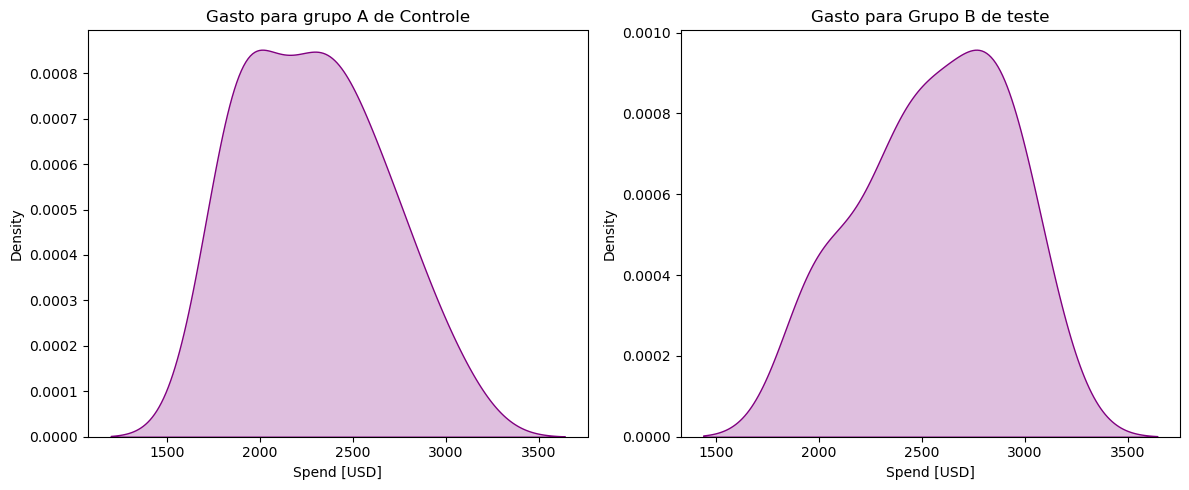

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=2,  figsize=(12, 5))

ax0 = sns.kdeplot(data=controle['Spend [USD]'],ax=ax[0], fill=True, color='purple')
ax0.set_title('Gasto para grupo A de Controle')

ax1 = sns.kdeplot(data=teste['Spend [USD]'],ax=ax[1], fill=True,color='purple')
ax1.set_title('Gasto para Grupo B de teste')


plt.tight_layout()
plt.show()

Nota-se o gasto menor para o grupo de controle

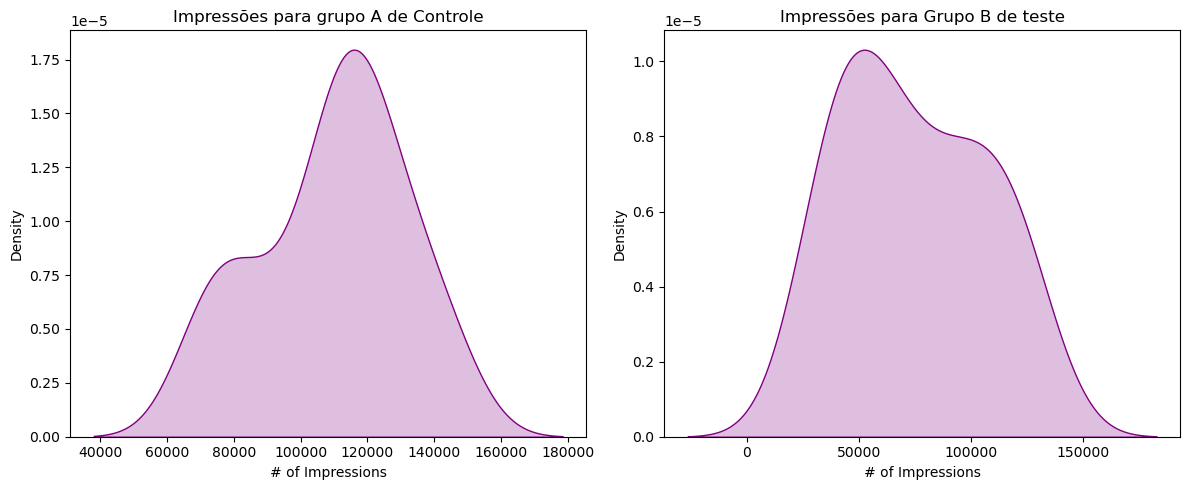

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=2,  figsize=(12, 5))

ax0 = sns.kdeplot(data=controle['# of Impressions'],ax=ax[0], fill=True,color='purple')
ax0.set_title('Impressões para grupo A de Controle')

ax1 = sns.kdeplot(data=teste['# of Impressions'],ax=ax[1], fill=True,color='purple')
ax1.set_title('Impressões para Grupo B de teste')


plt.tight_layout()
plt.show()

Em impressoes, o grupo controle performou melhor, obtendo maiores numeros de impressoes com o pico mais a direita que o grupo teste

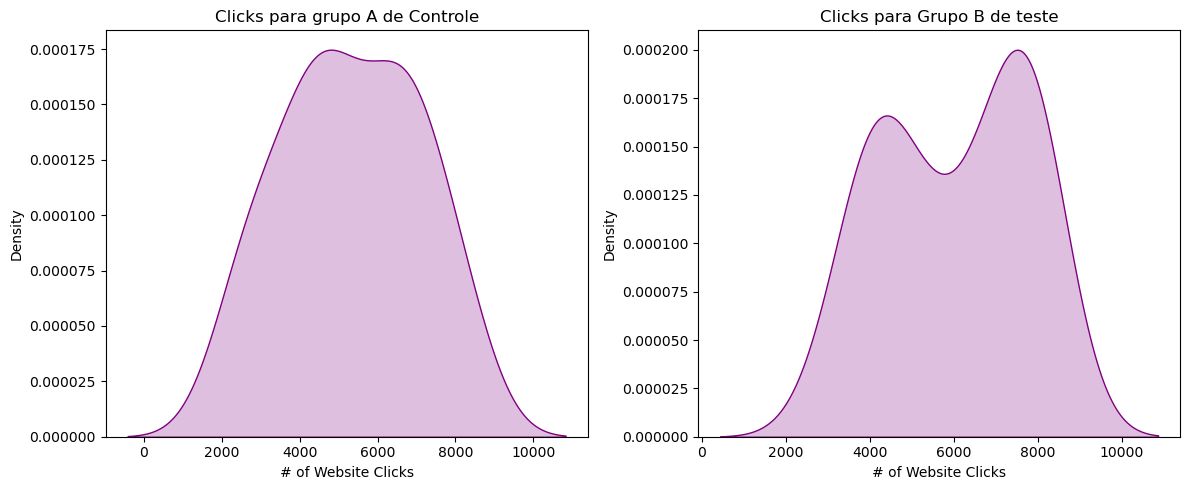

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=2,  figsize=(12, 5))

ax0 = sns.kdeplot(data=controle['# of Website Clicks'],ax=ax[0], fill=True,color='purple')
ax0.set_title('Clicks para grupo A de Controle')

ax1 = sns.kdeplot(data=teste['# of Website Clicks'],ax=ax[1], fill=True,color='purple')
ax1.set_title('Clicks para Grupo B de teste')


plt.tight_layout()
plt.show()

Em clicks o grupo A se manteve constante, porém o grupo de teste obteve mais clicks e uma distribuição bimodal com maiores niveis de densidade

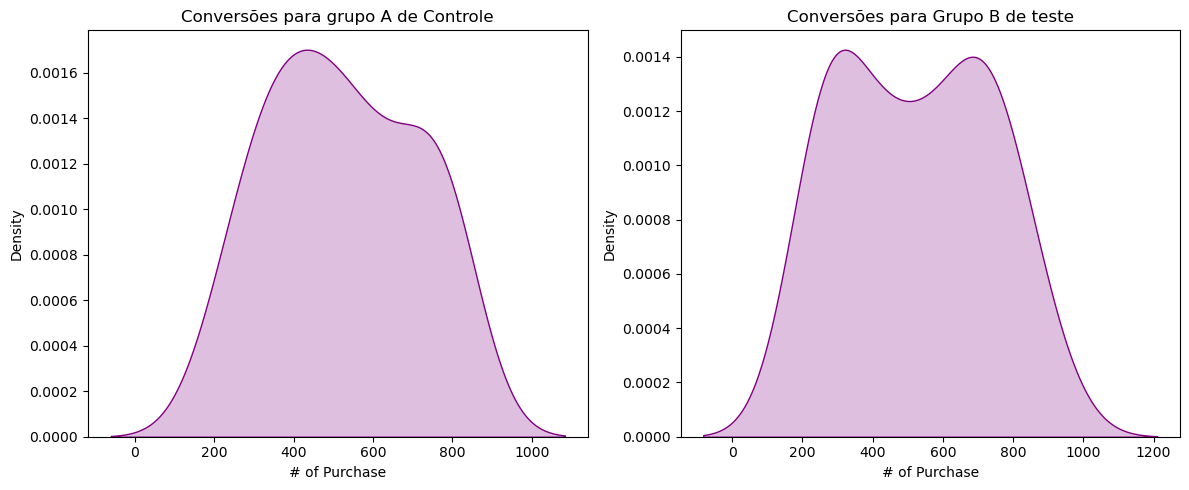

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,  figsize=(12, 5))

ax0 = sns.kdeplot(data=controle['# of Purchase'],ax=ax[0], fill=True,color='purple')
ax0.set_title('Conversões para grupo A de Controle')

ax1 = sns.kdeplot(data=teste['# of Purchase'],ax=ax[1], fill=True,)
ax1.set_title('Conversões para Grupo B de teste')


plt.tight_layout()
plt.show()